# design RR function for PM2.5 and  O3

based on Paper: 
Haikun Wang, Xiaojing He, Xinyu Liang, Ernani F Choma, Yifan Liu, Li Shan, Haotian Zheng,
749 Shaojun Zhang, Chris P Nielsen, ShuxiaoWang, et al. Health benefits of on-road transportation
750 pollution control programs in china. Proceedings of the National Academy of Sciences, 117(41):
751 25370–25377, 2020.

In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate 

In [2]:
# Pm2.5

In [3]:
import math
minpm=10
def rr_complex(x):
    y= math.exp((0.143*math.log((x-minpm)/1.6+1))/(1+math.exp(-1*(x-minpm-15.5)/36.8)))
    return y

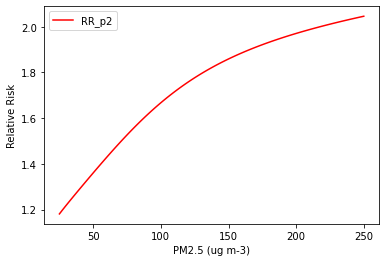

In [4]:
xnew = np.linspace(25, 250, num=100, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(xnew, [rr_complex(x) for x in xnew],color='r')
plt.legend(['RR_p2'], loc='best')
plt.axis('auto')
plt.xlabel('PM2.5 (ug m-3)')
plt.ylabel('Relative Risk')

plt.show()

In [5]:
# Ozone

In [6]:
np.heaviside([-1.5, 0, 2.0], 0.5)

array([0. , 0.5, 1. ])

In [7]:
def step_o3(x,c0=20,val=1.03):
    if x<=c0:
        f=1
    else:
        f=pow(val,(x-c0)/(10*2))  # original is /10 (ppb) we have ug m-3 so we convert roughly to /20 ug m-3
        
    return f

In [8]:
step_o3(50)

1.0453358312044987

In [9]:
step_o3_vec=np.vectorize(step_o3)

In [10]:
[step_o3(i) for i in [10,50] ]

[1, 1.0453358312044987]

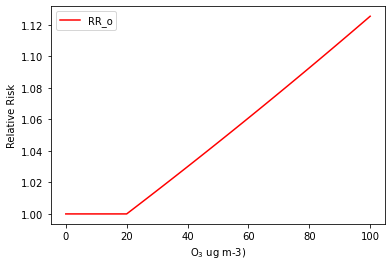

In [11]:
xnew = np.linspace(0, 100, num=101, endpoint=True)
plt.plot(xnew,[step_o3(i) for i in xnew], '-', color='red')
plt.legend(['RR_o'], loc='best')
plt.axis('auto')
plt.xlabel('O$_3$ ug m-3)')
plt.ylabel('Relative Risk')
plt.show()